# Linear Regression Assignment: Insurance Dataset

## Problem Statement
You have been provided with an **insurance dataset** that contains information about individuals, such as age, BMI, smoking status, and insurance charges. Your objective is to perform **Exploratory Data Analysis (EDA)** and build a **Linear Regression model** to predict the insurance charges based on the given features.

---

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


## Section 1: Data Inspection and Cleaning (10 Marks)
### Q1. Load the dataset and display the first five rows.
- Identify the columns present in the dataset.
- Check for missing values and data types.


In [2]:
df = pd.read_csv('/content/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


### Q2. Handle missing values and duplicates if any.
- Remove or impute missing values appropriately.
- Drop duplicate records if found.

---

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

np.int64(0)

## Section 2: Exploratory Data Analysis (20 Marks)
### Q3. Perform Univariate Analysis on all numerical columns.
- Plot histograms and boxplots for each numerical column.
- Write your observations about the distribution of the data.


Text(0.5, 1.0, 'Age distribution')

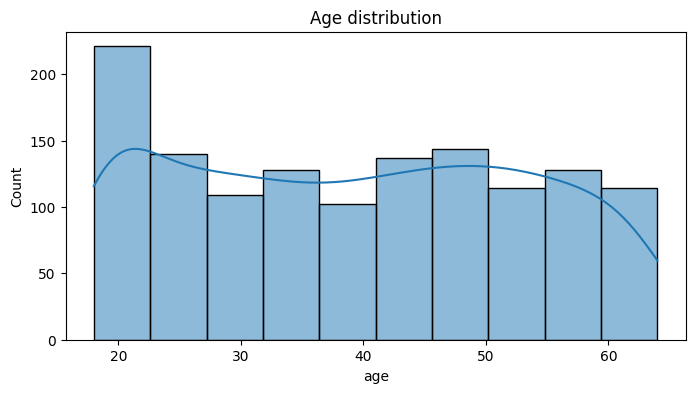

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x='age',bins = 10,kde=True)
plt.title('Age distribution')

Text(0.5, 1.0, 'Age distribution Boxplot')

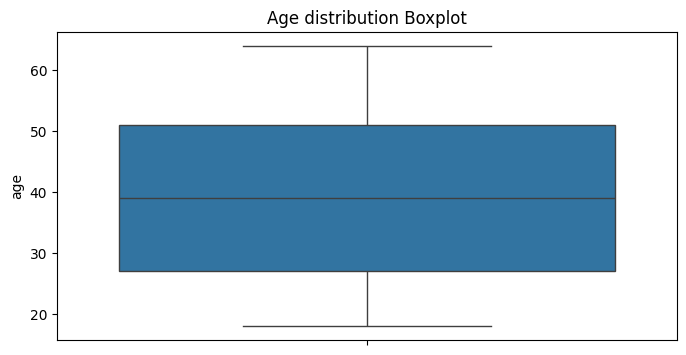

In [11]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df['age'])
plt.title('Age distribution Boxplot')

In [13]:
## Observations from Age distribution
'''1. Age distribution is not normal distribution as age data is ranging from <20 to 60+
2. Higher count of values is present around age of 20.
3. The age data does not have any outliers.
4. The median age is near 40 years.'''


'1. Age distribution is not normal distribution as age data is ranging from <20 to 60+\n2. Higher count of values is present around age of 20.\n3. The age data does not have any outliers.\n4. The median age is near 40 years.'

Text(0.5, 1.0, 'Gender distribution ')

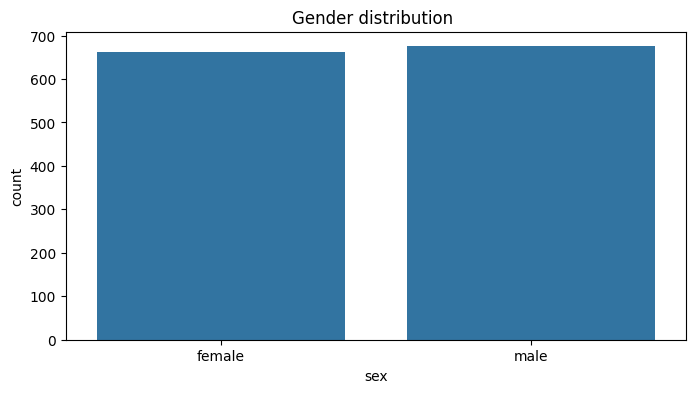

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(x='sex',data=df)
plt.title('Gender distribution ')

In [15]:
df['sex'].value_counts()

,count
sex,
male,675
female,662


In [16]:
# Observations for Gender distribution
'''1. The gender data is approxiamtely equally distribution and has around same count for male and female.'''


'1. The gender data is approxiamtely equally distribution and has around same count for male and female.'

Text(0.5, 1.0, 'bmi distribution')

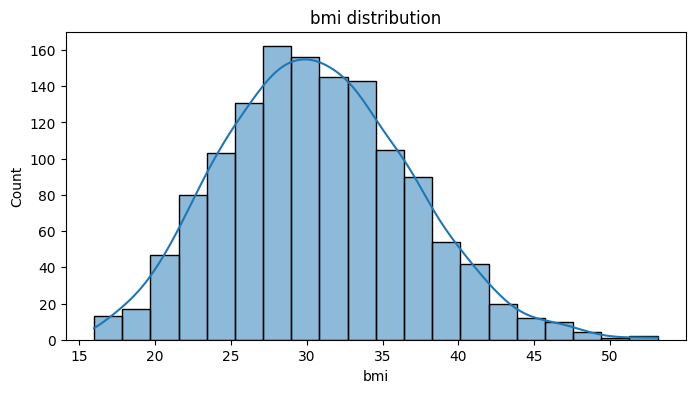

In [17]:
plt.figure(figsize=(8,4))
sns.histplot(data=df,x='bmi',kde=True,bins=20)
plt.title('bmi distribution')

Text(0.5, 1.0, 'bmi distribution')

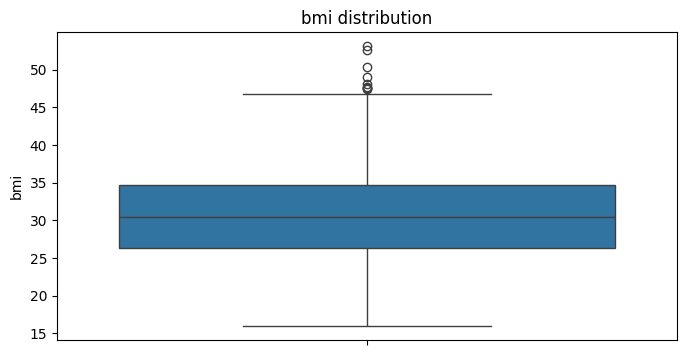

In [18]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df['bmi'])
plt.title('bmi distribution')

In [19]:
# Observations for BMI
'''1. Most BMI value ranges between 25 and 35.
2. The distribution is normal and right skewed.
3. Outliers are present above 45+ BMI'''

'1. Most BMI value ranges between 25 and 35.\n2. The distribution is normal and right skewed.\n3. Outliers are present above 45+ BMI'

Text(0.5, 1.0, 'Children distribution ')

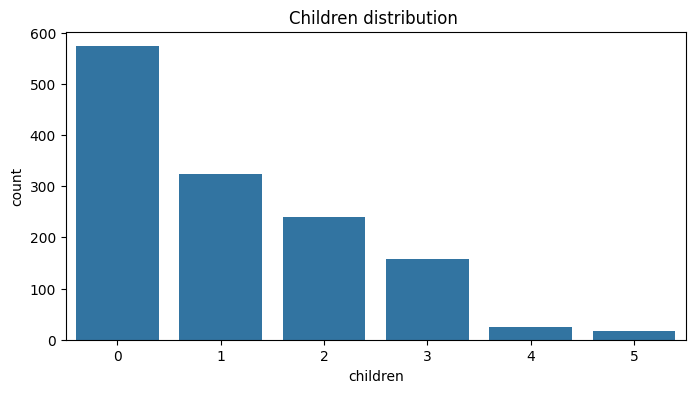

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(x='children',data=df)
plt.title('Children distribution ')

In [21]:
df['children'].value_counts()

,count
children,
0,573
1,324
2,240
3,157
4,25
5,18


In [22]:
# Observations wrt to children
'''1. Most of the people from dataset have 0 children.
2. People having more than 4 kids is less.'''

'1. Most of the people from dataset have 0 children.\n2. People having more than 4 kids is less.'

Text(0.5, 1.0, 'Smoker distribution ')

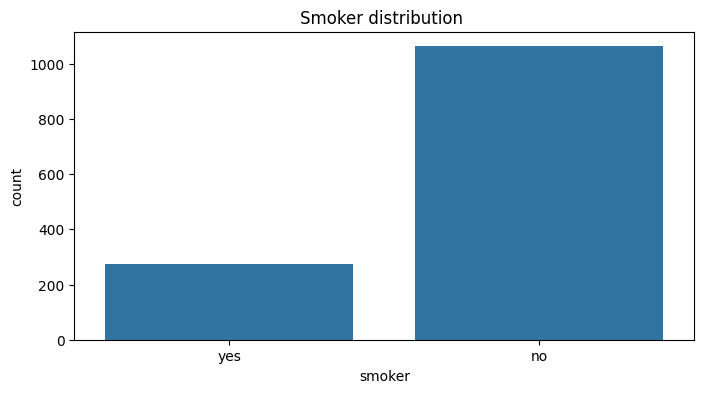

In [23]:
plt.figure(figsize=(8,4))
sns.countplot(x='smoker',data=df)
plt.title('Smoker distribution ')

In [24]:
df['smoker'].value_counts(normalize=True)*100

,proportion
smoker,
no,79.506358
yes,20.493642


In [26]:
# Observation wrt smoker
'''1. 79.50% people belong to non smoker category while rest are smokers'''

'1. 79.50% people belong to non smoker category while rest are smokers'

Q4. Perform Bivariate Analysis.
Use scatter plots to analyze relationships between independent variables and insurance charges.
Provide insights based on your observations.

<ipython-input-27-4a36c2858d61>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


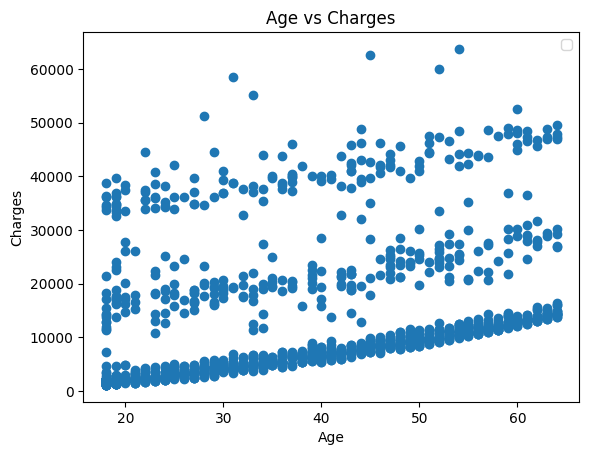

In [27]:
# Age vs charges

plt.scatter(df['age'],df['charges'])
plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Age vs Charges")
plt.legend()

In [28]:
# Observations for Age vs Charges

'''1. Age is loosely correlated with charges'''

'1. Age is loosely correlated with charges'

<ipython-input-29-471edb966660>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


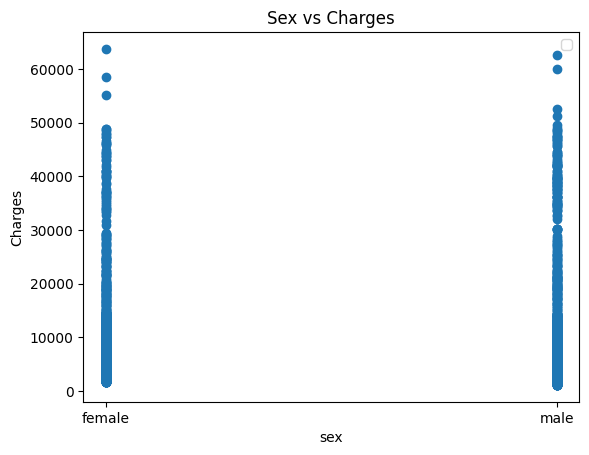

In [29]:
# Sex vs charges

plt.scatter(df['sex'],df['charges'])
plt.xlabel("sex")
plt.ylabel("Charges")
plt.title("Sex vs Charges")
plt.legend()

In [30]:
# Observations for Gender vs Charges
'''1. Gender and charges are weakly correlated
2. Both genders have almost same overlapping charges
3. Gender alone is not a key factor for deciding charges'''

'1. Gender and charges are weakly correlated\n2. Both genders have almost same overlapping charges\n3. Gender alone is not a key factor for deciding charges'

<ipython-input-31-50c4f7db3aae>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


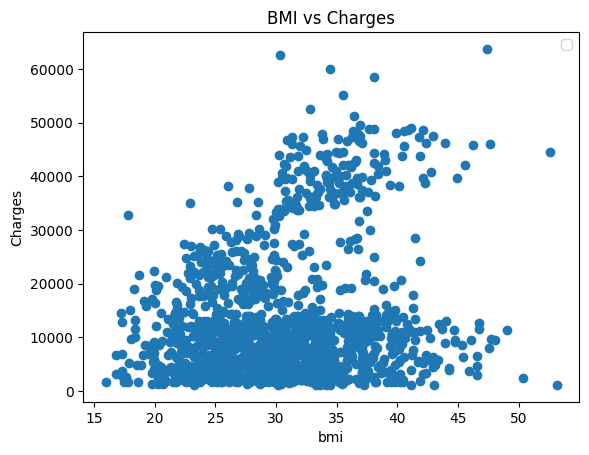

In [31]:
# BMI vs charges

plt.scatter(df['bmi'],df['charges'])
plt.xlabel("bmi")
plt.ylabel("Charges")
plt.title("BMI vs Charges")
plt.legend()

In [32]:
# Observations for BMI vs Charges
'''1. BMI is weakly correlated with charges
2. Different BMI values show similar charges'''


'1. BMI is weakly correlated with charges\n2. Different BMI values show similar charges'

<ipython-input-33-04711413e276>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


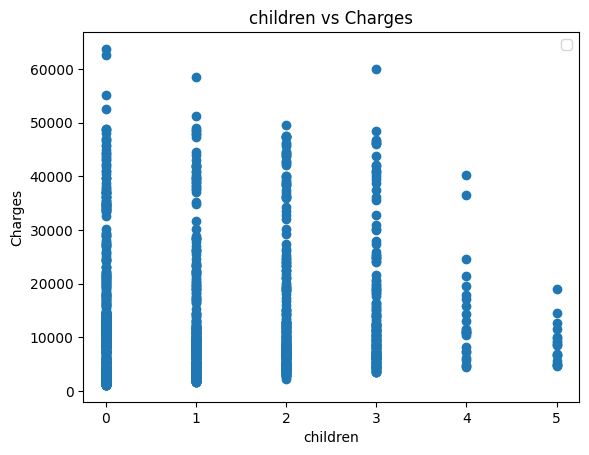

In [33]:
# Children vs charges

plt.scatter(df['children'],df['charges'])
plt.xlabel("children")
plt.ylabel("Charges")
plt.title("children vs Charges")
plt.legend()

In [34]:
# Observations for No. of children vs Charges
'''1. No. of children and charges are weakly correlated
2. No. of children ranging from 0 to 3 have  overlapping charges
3. No. of children alone is not a key factor for deciding charges'''

'1. No. of children and charges are weakly correlated\n2. No. of children ranging from 0 to 3 have  overlapping charges\n3. No. of children alone is not a key factor for deciding charges'

In [35]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['sex_encoded'] = encoder.fit_transform(df['sex'])
df['smoker_encoded'] = encoder.fit_transform(df['smoker'])
df

,age,sex,bmi,children,smoker,region,charges,sex_encoded,smoker_encoded
0,19,female,27.900,0,yes,southwest,16884.92400,0,1
1,18,male,33.770,1,no,southeast,1725.55230,1,0
2,28,male,33.000,3,no,southeast,4449.46200,1,0
3,33,male,22.705,0,no,northwest,21984.47061,1,0
4,32,male,28.880,0,no,northwest,3866.85520,1,0
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,1,0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


### Q5. Perform Multivariate Analysis.
- Use pair plots to visualize relationships among all numerical variables.
- Write insights based on observed trends.

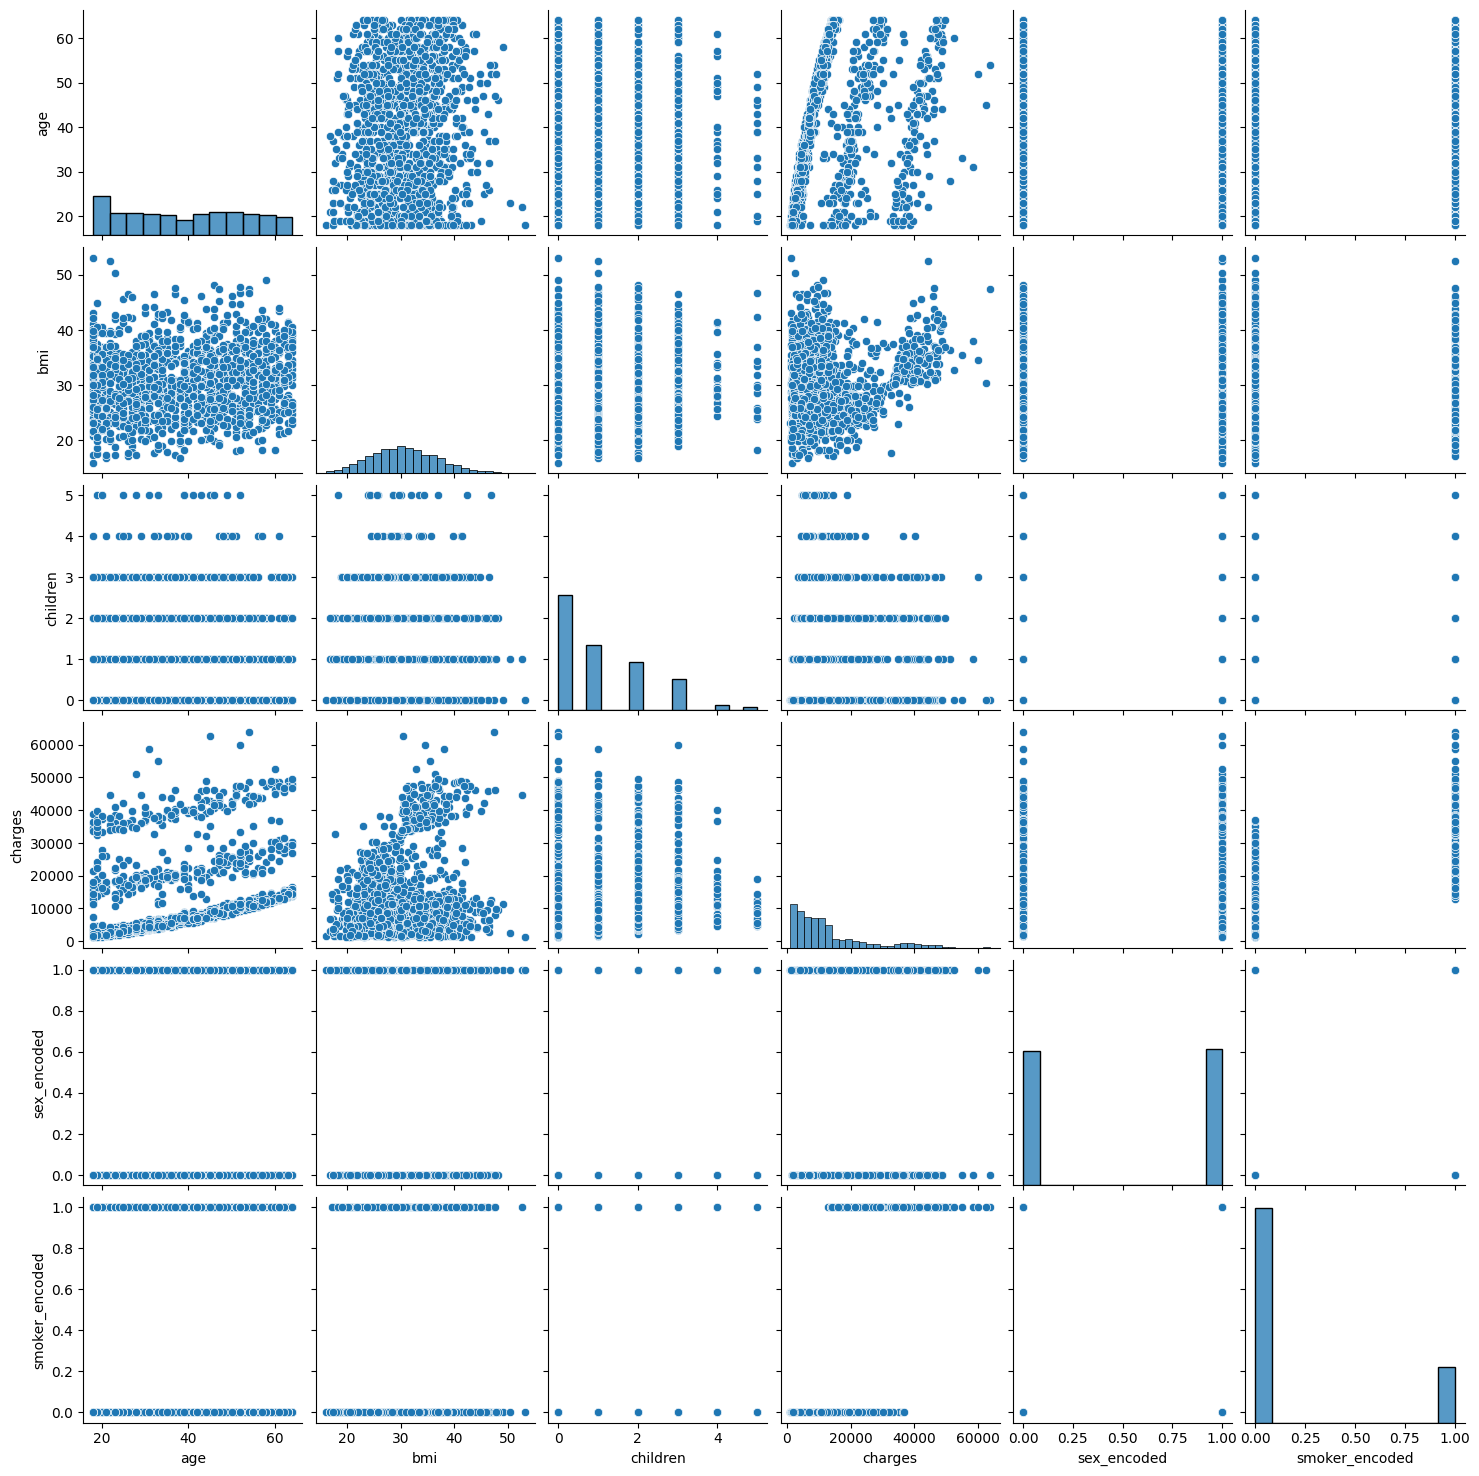

In [37]:
# Multivariate Analysis - Pairplot to check relationships between features
sns.pairplot(df)
plt.show()

In [38]:
# Observations from pairplot
'''1. Smoker value and charges are highly correlated while others are weakly to moderately correlated'''

'1. Smoker value and charges are highly correlated while others are weakly to moderately correlated'

### Q6. Generate a Heatmap.
- Display the correlation matrix using a heatmap.
- Identify highly correlated features and provide interpretations.

---

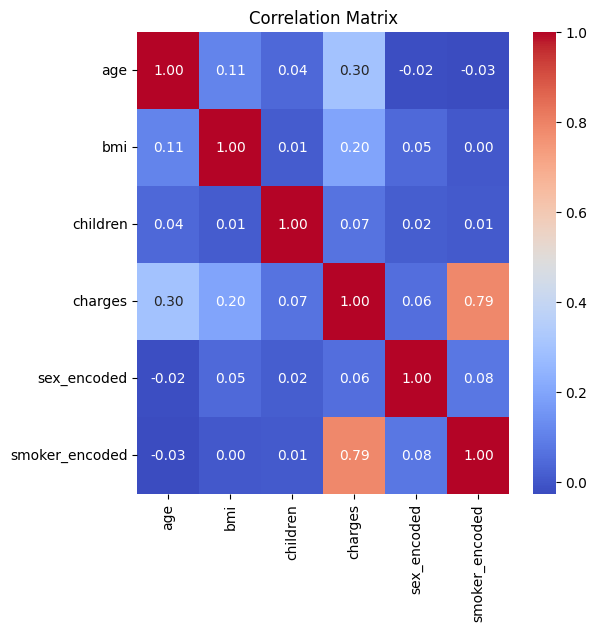

In [39]:
# Heatmap to visualize correlation between features
plt.figure(figsize=(6, 6))
sns.heatmap(df[['age', 'bmi', 'children','charges',
       'sex_encoded', 'smoker_encoded']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [40]:
# Heatmap observations
'''1. Strong correlation between smoker and charges (0.79) indicating smoking impacting the charges'''

'1. Strong correlation between smoker and charges (0.79) indicating smoking impacting the charges'

## Section 3: Model Building and Evaluation (20 Marks)
### Q7. Split the dataset into training and testing sets.
- Use an **80-20** or **70-30** split.

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [42]:
X = df.drop(columns=['sex','smoker','region','charges'])
y = df['charges']


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train

,age,bmi,children,sex_encoded,smoker_encoded
1114,23,24.510,0,1,0
968,21,25.745,2,1,0
599,52,37.525,2,0,0
170,63,41.470,0,1,0
275,47,26.600,2,0,0
...,...,...,...,...,...
1096,51,34.960,2,0,1
1131,27,45.900,2,1,0
1295,20,22.000,1,1,0
861,38,28.000,3,0,0


### Q8. Build a **Linear Regression Model**.
- Train the model using the training dataset.
- Display the model coefficients and intercept.

In [45]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [46]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [47]:
model.score(X_train,y_train)

0.7292291093848737

In [48]:
model.score(X_test,y_test)

0.8046218811772659

In [49]:
def adjusted_r2(r2, n, k):
    """Calculate the adjusted R²."""
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

### Q9. Evaluate the model on the test dataset.
- Compute **R-squared, Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE)**.


In [50]:
# Training performance
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = mse_train ** 0.5
r2_train = r2_score(y_train, y_train_pred)
adj_r2_train = adjusted_r2(r2_train, len(y_train), X_train.shape[1])

print(f"\nTraining Performance:")
print(f"Mean Absolute Error (MAE): ${mae_train:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_train:.2f}")
print(f"R-squared (R²): {r2_train:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_train:.2f}")


Training Performance:
Mean Absolute Error (MAE): $4187.48
Root Mean Squared Error (RMSE): $6088.72
R-squared (R²): 0.73
Adjusted R-squared (Adj. R²): 0.73


In [51]:
mae_test = mean_absolute_error(y_test, y_test_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_test_pred)
adj_r2_test = adjusted_r2(r2_test, len(y_test), X_test.shape[1])

print(f"\nTest Performance:")
print(f"Mean Absolute Error (MAE): ${mae_test:.2f}")
print(f"Root Mean Squared Error (RMSE): ${rmse_test:.2f}")
print(f"R-squared (R²): {r2_test:.2f}")
print(f"Adjusted R-squared (Adj. R²): {adj_r2_test:.2f}")


Test Performance:
Mean Absolute Error (MAE): $4198.11
Root Mean Squared Error (RMSE): $5991.82
R-squared (R²): 0.80
Adjusted R-squared (Adj. R²): 0.80


### Q10. Interpret the Error Metrics.
- Explain the significance of each metric in evaluating model performance.
- What do these values indicate about the model's accuracy?

---

In [52]:
# Compare training and test performance
print("\nPerformance Comparison:")
print(f"Training vs Test MAE: ${mae_train:.2f} vs ${mae_test:.2f}")
print(f"Training vs Test RMSE: ${rmse_train:.2f} vs ${rmse_test:.2f}")
print(f"Training vs Test R²: {r2_train:.2f} vs {r2_test:.2f}")
print(f"Training vs Test Adj. R²: {adj_r2_train:.2f} vs {adj_r2_test:.2f}")


Performance Comparison:
Training vs Test MAE: $4187.48 vs $4198.11
Training vs Test RMSE: $6088.72 vs $5991.82
Training vs Test R²: 0.73 vs 0.80
Training vs Test Adj. R²: 0.73 vs 0.80


In [53]:
# Interpretation of error metrics

'''1. The R^2 value of 0.80 indicates model explains 80% variance in charges.
2. The RMSE of approximately $5991.82 suggests that the model predictions have an average error of this amount.
3. Strong correlation between smoker and charges (0.79) indicating smoking impacting the charges can be observed from the heatmap.
4. No missing data was present in data.
5. One duplicate value was present in data which was removed from dataset for better training of model.'''


'1. The R^2 value of 0.80 indicates model explains 80% variance in charges.\n2. The RMSE of approximately $5991.82 suggests that the model predictions have an average error of this amount.\n3. Strong correlation between smoker and charges (0.79) indicating smoking impacting the charges can be observed from the heatmap.\n4. No missing data was present in data.\n5. One duplicate value was present in data which was removed from dataset for better training of model.'

## Section 4: Model Interpretation and Conclusion (10 Marks)
### Q11. Explain the significance of each feature in predicting insurance charges.
- Which features are most impactful?
- How does smoking status affect the charges?

In [54]:
'''Smoker feature was the most impactful as it is highly correlated with charges. Smoking increases the charges muttifold comapred to non smoker.'''

'Smoker feature was the most impactful as it is highly correlated with charges. Smoking increases the charges muttifold comapred to non smoker.'

### Q12. What are the limitations of your model?
- Discuss any assumptions of **Linear Regression** that might not hold in this dataset.
- Suggest improvements for better prediction accuracy.

---

In [55]:
'''Only one feature is highly correlated with target variable , hence relying only on just one feature can lead to missed information.


Further model improvement could be considered by exploring polynomial regression, feature engineering, or regularization techniques.'''

'Only one feature is highly correlated with target variable , hence relying only on just one feature can lead to missed information.\n\n\nFurther model improvement could be considered by exploring polynomial regression, feature engineering, or regularization techniques.'

In [113]:
## Polynomial Regression

from sklearn.preprocessing import PolynomialFeatures

degree = 2

poly = PolynomialFeatures(degree=degree)



In [114]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [115]:
X_train.shape

(1069, 5)

In [116]:
X_train_poly.shape

(1069, 21)

In [117]:
poly_model = LinearRegression()

poly_model.fit(X_train_poly,y_train)

LinearRegression()

In [118]:
from sklearn.metrics import r2_score
y_test_pred_poly = poly_model.predict(X_test_poly)



In [119]:
# 🔹 Function to Calculate Adjusted R²
def adjusted_r2(r2, n, p): #r2- standard r2 value, # n- no. of samples, #p- no. of predictors (features used in model)
    return 1 - ((1 - r2) * (n - 1) / (n - p - 1))

In [120]:
mae_poly = mean_absolute_error(y_test,y_test_pred_poly)
mse_poly = mean_squared_error(y_test,y_test_pred_poly)
rmse_poly = np.sqrt(mse_poly)
r2_score_poly = r2_score(y_test,y_test_pred_poly)
adjusted_r2_score_poly = adjusted_r2(r2_score_poly, X_test_poly.shape[0],X_test_poly.shape[1]-1)


In [121]:
print('MAE Poly: ', mae_poly)
print('MSE Poly: ', mse_poly)
print('RMSE Poly: ', rmse_poly)
print('R2 Poly : ', r2_score_poly)
print('Adjuested R2 Poly: ', adjusted_r2_score_poly)

MAE Poly:  2895.1709479492933
MSE Poly:  21562838.550766405
RMSE Poly:  4643.580359029701
R2 Poly :  0.8826550913392246
Adjuested R2 Poly:  0.8731534793019149


In [92]:
## Regularization

from sklearn.linear_model import Ridge, Lasso

alpha_ridge = 1.0

ridge_model = Ridge(alpha = alpha_ridge) ## L2 Regularization

ridge_model.fit(X_train,y_train)


y_test_pred_ridge = ridge_model.predict(X_test)

mae_ridge = mean_absolute_error(y_test,y_test_pred_ridge)
mse_ridge = mean_squared_error(y_test,y_test_pred_ridge)
rmse_ridge = np.sqrt(mse_ridge)
r2_score_ridge = r2_score(y_test,y_test_pred_ridge)
adjusted_r2_score_ridge = adjusted_r2(r2_score_ridge, X_test.shape[0],X_test.shape[1]-1)


print('MAE ridge: ', mae_ridge)
print('MSE ridge: ', mse_ridge)
print('RMSE ridge: ', rmse_ridge)
print('R2 ridge : ', r2_score_ridge)
print('Adjuested R2 ridge: ', adjusted_r2_score_ridge)

MAE ridge:  4215.1651331187995
MSE ridge:  36076331.51462652
RMSE ridge:  6006.3575913049435
R2 ridge :  0.8036727021615048
Adjuested R2 ridge:  0.8006867356544554


In [103]:
alpha_lasso = 0.002

lasso_model = Lasso(alpha = alpha_lasso) ## L1 Regularization

lasso_model.fit(X_train,y_train)


y_test_pred_lasso = lasso_model.predict(X_test)

mae_lasso = mean_absolute_error(y_test,y_test_pred_lasso)
mse_lasso = mean_squared_error(y_test,y_test_pred_lasso)
rmse_lasso = np.sqrt(mse_lasso)
r2_score_lasso = r2_score(y_test,y_test_pred_lasso)
adjusted_r2_score_lasso = adjusted_r2(r2_score_lasso, X_test.shape[0],X_test.shape[1]-1)


print('MAE lasso: ', mae_lasso)
print('MSE lasso: ', mse_lasso)
print('RMSE lasso: ', rmse_lasso)
print('R2 lasso : ', r2_score_lasso)
print('Adjuested R2 lasso: ', adjusted_r2_score_lasso)

MAE lasso:  4198.113122597269
MSE lasso:  35901930.276670426
RMSE lasso:  5991.821949680283
R2 lasso :  0.8046217932234307
Adjuested R2 lasso:  0.8016502615614297


In [96]:
## Hyperparameter Tuning


from sklearn.model_selection import GridSearchCV

param_grid_ridge = {'alpha':[0.01,0.1,0.3,0.5,0.7,1.0]}

grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid= param_grid_ridge, cv=5)

grid_search_ridge.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 0.3, 0.5, 0.7, 1.0]})

In [98]:
grid_search_ridge.best_params_

{'alpha': 1.0}

In [99]:
grid_search_ridge.best_score_

np.float64(0.7257066664711163)

In [111]:
param_grid_lasso = {'alpha':[0.01,0.001,0.003,0.5,0.7]}

grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid= param_grid_lasso, cv=5)

grid_search_lasso.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(alpha=0.002),
             param_grid={'alpha': [0.01, 0.001, 0.003, 0.5, 0.7]})

In [112]:
grid_search_lasso.best_params_

{'alpha': 0.7}

In [128]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('poly',PolynomialFeatures()),('regressor',LinearRegression())])

param_grid_poly = {'poly__degree':[2,3,4,5]}

grid_search_poly = GridSearchCV(pipe,param_grid=param_grid_poly, cv=5)



---

Polynomial regression model is giving good accuracy compared to other regularization